
# CS110 Spring 2020 - Assignment 4
# Decoding relationships between genes

## Notes on the Submission Materials

1. Your **first resource** should be a PDF file created from the Jupyter notebook template provided in these instructions. If your name is “Dumbledore”, your PDF should be named “Dumbledore.pdf”. **For best results, follow [this guide](https://docs.google.com/document/d/1SJbsx0r2Kh0VsmF_t_q84awPK-88yZlK8nO7pHWtFBA/edit?usp=sharing) to convert the Jupyter Notebook to a PDF. Regardless of the method you choose, make sure that, in your PDF submission, texts can be selected/ highlighted.**
2. Your **second resource** must be a single Jupyter Notebook named “Dumbledore.ipynb”. Alternatively, you can also submit a zip file that includes your Jupyter notebook, but please make sure to name it “Dumbledore.zip” (the Jupyter notebook submitted as part of such zip file should still be named “Dumbledore.ipynb”!).
    * You can add more cells to expand your answers but do not copy cells within the notebook.
    * Only submit one .ipynb file (as opposed to multiple different .ipynb files).
    * If you submit a .zip file, it needs to be a flat directory.


## Notes on the Grading Rubrics

* This is a strictly individual assignment. Everything you submit must reflect your own writing and coding. Please do refer to the course guidelines on the syllabus namely in what constitutes plagiarism. 
* All the tasks will be graded on the indicated companion LOs; please make sure to consult their descriptions and rubrics in the course syllabus to maximally align your approach to them. You will not be penalized for not attempting the optional challenge.
* As per the course’s policy on the syllabus, you will need to footnote at least three HCs by including a meaningful justification of the application of each HC and explaining in detail how they enabled you to complete this assignment. Please refer to [these guidelines](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit) on how to incorporate HCs in your work.


## Overview
Gene Mutation is a prevailing and computationally intensive research topic in Genetics. For this assignment, assume that you have been hired by a biotechnology company to work on a gene mutation research project, and your first task is to write a Python program to investigate a genealogical mutation sequencing.


In this program, a gene is described by a string of letters, with a letter being chosen from the set ${A, C, G, T}$. A mutation is relatively rare but it can occur in which there is a small probability of either inserting a new character, deleting an existing character, or changing to a new character randomly. We can refer to these probabilities by $p_i, p_d$, and $p_c$, respectively.


Now, suppose the starting point is a given string that undergoes a mutation process. This mutation created two other strings, the child strings of the first string. Each of these two new strings can undergo mutations by which they will change from their parent. In turn, the two-child strings, mutate and create 2 new substrings each, resulting in four grandchild strings from the original gene sequencing string. We can easily visualize the sequence of mutations if we were to draw a genealogy binary tree relating strings to their parent and grandparent strings.

As a result of these mutations, we now have 7 strings but unfortunately, the order of the strings has been lost due to a glitch in the gene sequencing generation program. Therefore, your first task in the project is to recover the genealogy tree for the following set of 7 strings labelled with lowercase letters:
``` python
('a', 'AGTTATGTGTCAGAGCAAAAGATTCCTCATCTAGCGGTCGCAAGTCATTGCC'),
('b', 'AAGTTATTTGCTCACAGGGAACGAATCCAGCTCTGCGGTCGAGGCCACATTGCC'),
('c', 'AGTTATTTTCAGAGAAATGATTCCTTCTCACCGGTCGAGCCAGTGCC'),
('d', 'AGTTTATGTGTCAGAAGCAAAAGATTACTAATCTACGCGTCGCAAGGTCTATTCC'),
('e', 'ACAGCTTATATAGCTCATAGGGAGCGAAATCCAGCCCCGCGGTGCGAGGCCCCTTGTCGC'),
('f', 'AAGTATATGGCACGAGGGAACAGTATCAGCTCTTCGGATAAAGGCCACAGTGCC'),
('g', 'AGTTATGTGTCACAGGCAAAAGATCCTTCTCTGCGGTCGAACCCATTGCC')
```


Henceforth, the set of strings created with the gene-sequencing generation program will be referred to as `Set_Strings`.

# Assignment Questions

Each of the questions below will be graded on the CS110 LOs included inside square brackets:

## Task 1. [#responsibility] [appropriate LO for the make-up work] 

Take a screenshot of your CS110 dashboard on Forum where the following is visible: 
* your name.
* your absences for the course have been set to excused up to the end of week 11 (inclusively). 

Submit this screenshot as a PNG file on your Jupyter notebook. 


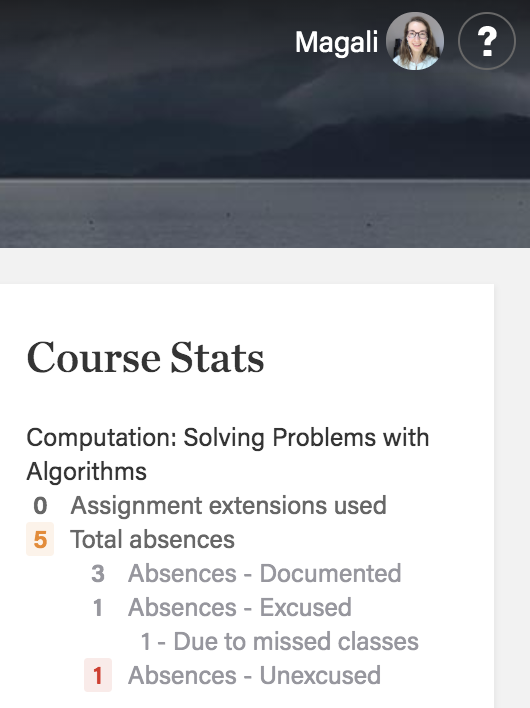

In [1]:
from IPython.display import Image
Image(filename='Dashboard.png')

In [2]:
# Import libraries
import numpy as np
import math
import networkx as nx # to build graphs


## Task 2. [#DynamicProgramming, #PythonProgramming, #CodeReadability] 

Write Python code which, given any two arbitrary strings, outputs the length of the Longest Common Subsequence (LCS) for those two strings. Make sure to include a number of test cases that demonstrate that your code is correct.

__Coding__

In [3]:
def lcs_length(x, y):
    """
    Computes the length of an LCS of strings x and y.
    
    Inputs:
    - x, y: strings
    
    Outputs:
    - c: a list of lists of ints OR a numpy array. c[i,j] contains the 
    length of a LCS of x[:i] and y[:j]
    - b: a list of lists of strings OR a numpy array, containing the information
    used for LCS reconstruction (See Cormen et al.) Use "N" (North), "NW" 
    (North West), and "W" (West) that correspond to the directions of the arrows 
    used in Cormen et al.
    """
    # put into lists
    x = list(x)
    y = list(y)
    
    # calculate length of strings
    m = len(x)
    n = len(y)
    
    # create the tables, initiate with 0s
    b = [[0 for ni in range(n)] for mi in range(m)]
    c = [[0 for ni in range(n+1)] for mi in range(m+1)]
    
    # loop through the strings and populate the table
    for i in range(1, m+1):
        for j in range(1, n+1):
            if x[i-1] == y[j-1]:
                c[i][j] = c[i-1][j-1] + 1
                b[i-1][j-1] = "NW"
            elif c[i-1][j] >= c[i][j-1]:
                c[i][j] = c[i-1][j]
                b[i-1][j-1] = "N"
            else:
                c[i][j] = c[i][j-1]
                b[i-1][j-1] = "W"
                
    return c, b

In [4]:
def print_lcs(b,x,i,j):
    """
    Finds a LCS.
    
    Inputs:
    - b: a list of lists of strings OR a numpy array, returned by lcs_length
    - x: string, an input to lcs_length
    - i, j: ints. print_lcs(b,x,i,j) returns a lcs of x[:i] and y[:j], where y
    is an input to lcs_length.
    
    Outputs:
    - lcs: list of strings, representing a LCS of x and y
    
    You can choose to actually PRINT OUT the LCS or not using the print function.
    
    """
    if (i==-1 or j==-1):
        lcs = []
        return lcs, 0
    if b[i][j] == "NW":
        lcs, _ = print_lcs(b, x, i-1, j-1)
        lcs.append(x[i])
    elif b[i][j] == "N":
        lcs, _ = print_lcs(b, x, i-1, j)
    else:
        lcs, _ = print_lcs(b, x, i, j-1)
        
    return lcs, len(lcs)

In [5]:
def longest_common_subsequence(x, y):
    """
    Gives the length of the longest common substring (LCS) between strings x and y
    
    Inputs:
    - x, y: strings
    
    Output: 
    - len_LCS: int
    """
    
    c, b = lcs_length(x, y)
    len_LCS = c[len(x)][len(y)]
    
    return len_LCS

__Testing__

In [6]:
# 13.2 class-case
x, y = '10010101', '010110110'
c, b = lcs_length(x, y)
print("\nc is:")
for cc in c:
    print(cc)
print("\nb is:")
for bb in b:
    print(bb)


c is:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 2, 2, 2, 2, 2, 2, 2]
[0, 1, 1, 2, 2, 2, 3, 3, 3, 3]
[0, 1, 2, 2, 3, 3, 3, 4, 4, 4]
[0, 1, 2, 3, 3, 3, 4, 4, 4, 5]
[0, 1, 2, 3, 4, 4, 4, 5, 5, 5]
[0, 1, 2, 3, 4, 4, 5, 5, 5, 6]
[0, 1, 2, 3, 4, 5, 5, 6, 6, 6]

b is:
['N', 'NW', 'W', 'NW', 'NW', 'W', 'NW', 'NW', 'W']
['NW', 'N', 'NW', 'W', 'W', 'NW', 'W', 'W', 'NW']
['NW', 'N', 'NW', 'N', 'N', 'NW', 'W', 'W', 'NW']
['N', 'NW', 'N', 'NW', 'NW', 'N', 'NW', 'NW', 'W']
['NW', 'N', 'NW', 'N', 'N', 'NW', 'N', 'N', 'NW']
['N', 'NW', 'N', 'NW', 'NW', 'N', 'NW', 'NW', 'N']
['NW', 'N', 'NW', 'N', 'N', 'NW', 'N', 'N', 'NW']
['N', 'NW', 'N', 'NW', 'NW', 'N', 'NW', 'NW', 'N']


In [7]:
# longest_common_subsequence_2(b, x, len(x)-1, len(y)-1)
longest_common_subsequence(x, y)
#print(lcs)

6

In [8]:
x, y = 'abc', 'xabc'
c, b = lcs_length(x, y)
print("\nc is:")
for cc in c:
    print(cc)
print("\nb is:")
for bb in b:
    print(bb)

longest_common_subsequence(x, y) # = 3


c is:
[0, 0, 0, 0, 0]
[0, 0, 1, 1, 1]
[0, 0, 1, 2, 2]
[0, 0, 1, 2, 3]

b is:
['N', 'NW', 'W', 'W']
['N', 'N', 'NW', 'W']
['N', 'N', 'N', 'NW']


3

In [9]:
longest_common_subsequence('ABCBDAB', 'BDCABA') # = 4

4

In [10]:
longest_common_subsequence('abc', '') # = 0

0

In [11]:
longest_common_subsequence('abc', 'a') # = 1

1

In [12]:
longest_common_subsequence('abc', 'ac') # = 2

2

In [13]:
assert longest_common_subsequence('ABCBDAB', 'BDCABA')==4
assert longest_common_subsequence('abc', '') == 0
assert longest_common_subsequence('abc', 'a') == 1
assert longest_common_subsequence('abc', 'ac') == 2

## Task 3. [#DynamicProgramming] 

How many LCSs are there in Set_Strings? Generate the matrix of the lengths of the LCS for every pair of strings in Set_Strings. Make sure that your matrix obeys the following properties:
1. The matrix should be cast as a two-dimensional numpy array.  **Store this 2D numpy array to a variable named `C`**.

2. Your 2D array `C` should have dimension (7,7) and `C[i,j]` should give the length of the LCS for the $i-$th and $j-$th strings. For example, `C[0,3]` gives the length of the LCS for string `a` and string `d`.

__Coding__

In [14]:
def LCS_in_strings(Set_Strings):
    # create 2D numpy array
    C = [[0 for i in range(7)] for i in range(7)]
    # print(C)
    
    # loop through strings
    for i in range(len(Set_Strings)):
        for j in range(len(Set_Strings)):
            C[i][j] = longest_common_subsequence(Set_Strings[i], Set_Strings[j]) # populate table with LCS of string pairs
    
    # print the matrix
    print("\nC is:")
    for cc in C:
        print(cc)
    
    return C

__Testing__

In [15]:
# define Set_Strings

a = 'AGTTATGTGTCAGAGCAAAAGATTCCTCATCTAGCGGTCGCAAGTCATTGCC'
b = 'AAGTTATTTGCTCACAGGGAACGAATCCAGCTCTGCGGTCGAGGCCACATTGCC'
c = 'AGTTATTTTCAGAGAAATGATTCCTTCTCACCGGTCGAGCCAGTGCC'
d = 'AGTTTATGTGTCAGAAGCAAAAGATTACTAATCTACGCGTCGCAAGGTCTATTCC'
e = 'ACAGCTTATATAGCTCATAGGGAGCGAAATCCAGCCCCGCGGTGCGAGGCCCCTTGTCGC'
f = 'AAGTATATGGCACGAGGGAACAGTATCAGCTCTTCGGATAAAGGCCACAGTGCC'
g = 'AGTTATGTGTCACAGGCAAAAGATCCTTCTCTGCGGTCGAACCCATTGCC'

Set_Strings = [a, b, c, d, e, f, g]
alpha = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

# get lenghts (for later reference)
al = len(a)
bl = len(b)
cl = len(c)
dl = len(d)
el = len(e)
fl = len(f)
gl = len(g)

In [16]:
C = LCS_in_strings(Set_Strings)


C is:
[52, 40, 41, 48, 39, 38, 45]
[40, 54, 38, 38, 47, 44, 43]
[41, 38, 47, 39, 36, 36, 39]
[48, 38, 39, 55, 38, 37, 42]
[39, 47, 36, 38, 60, 39, 40]
[38, 44, 36, 37, 39, 54, 40]
[45, 43, 39, 42, 40, 40, 50]


In [17]:
C

[[52, 40, 41, 48, 39, 38, 45],
 [40, 54, 38, 38, 47, 44, 43],
 [41, 38, 47, 39, 36, 36, 39],
 [48, 38, 39, 55, 38, 37, 42],
 [39, 47, 36, 38, 60, 39, 40],
 [38, 44, 36, 37, 39, 54, 40],
 [45, 43, 39, 42, 40, 40, 50]]

In [18]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Task 4. [#DataStructures]
Manually examine the matrix you obtained above, and infer the genealogical relationships between strings (i.e., explicitly identify the great-grandparent, grandparent, parent and child strings) using **at least** two strategies: one that  is **local** and another that is **global**. A local strategy infers the location of a particular string in the tree based on a property (of your choice) of the node itself. A global strategy infers the whole tree based on a metric obtained by considering all the relationships involved in that tree at once. You may need to research what a good metric could be to describe global relationships (i.e., beyond what was discussed in class). 

After describing and implementing your strategies, draw the resulting genealogy binary tree(s) associated with Set_Strings resulting from each strategy. Comment on whether the results are expected to be the same or different and provide a concise explanation for these results. 

__Describing strategies__

_Local_:


My property of choice is the sum of the LCS lengths. The lengths of the LCS is the data that is available.  

The strings with the largest sum of LCS lengths have the highest probability of being in the center of the genealogical tree (i.e. being the "children") as they will have the highest probability of sharing the same gene sequence as the root/parent gene. Similarly, it will have two children who are likely to share a similar gene pattern. Hence, it has three nodes with which it will have a high likelihood of sharing a high number of nucleotides or the longest LCSs.

The parent will have the third (after the two middle children) highest probability of having many shared nucleotide patterns or longest LCSs. Specifically, it has two children who are derived from it, and, though some mutations occur, there is a higher probability for a child sequence to resemble a parent sequence than a sibling sequence.  The sibling may mutate in the "opposite" way whereas there is only one mutation occurence for the parent-child relationship (instead of two possible mutation of the same nucleotide between siblings).

It follows from this that the grandchildren or siblings are the ones who are the most likely to have the lowest LCS length sum because the genes they represent have gone through the most mutations and are directly related only to one parent. 

___NOTE TO SELF___: _Sum of top three or just sum of all LCS lengths?_

_Global_: 


We can think of a geneological tree as nodes connected by edges representing the strings or genes and LCS lengths, respectively.  A geneological tree with the highest sum of LCS lengths between generations implies the least amount of modifications between genes of a generation.  Less modifications between parents and children and therefore longer LCS are more probable than less modifications between parents and grandchildren.  Parents and grandchildren have two generations of possible mutations between them which increases the likelihood of differing allele patterns. Hence, nodes that share a large LCS should be favored as having the parent-child relationship over the parent-grandchild relationship.  Similarly, siblings will have gone through two independent cycles of gene modification and are therefore less likely to share a high number of common in-order alleles.  Considering this, I will focus on the parent-child relationship and choosing the maximum LCS lengths when deciding on the nodes in relationship.  If this is considered at each level, the tree which follows this optimization criterion will have maximum sum of LCS lengths. 

This problem displays both optimal substructure and overlapping subcomponets. Dynamic programming can be used to solve it. 

I should build graphs with the edges weighted by the length of the LCS. Each time, the algorithm should seek to connect nodes that have not yet been placed and that share the highest LCS length. 

To compare the sum of the trees edges, we will have to traverse the tree and get the total of the edges' weights.

A minimum viable product for this is to create all the possible tree combinations, compute the sum of the edges, and then choose the tree with the relationship structure that results in the highest sum.

__Coding / Implementing__

_Local strategy:_

In [19]:
def print_tree(tree, n_lev, n_gt):
    """
    Prints the tree according to levels 
    
    Input:
    - tree, list of nodes from parent --> leaves
    - n_lev, int representing number of levels in the tree
    - n_gt, list of integers representing number of nodes at each level
    """

    # print tree
    gene = 0
    for l in range(n_lev):
        print("\nGENERATION", l, ":")
        for n in range(n_gt[l]):
            # print("(gene", name[gene], ")")
            print(tree[gene])
            gene = gene+1

In [82]:
# LOCAL strategy
def local_gyneology(C, Set_Strings, alpha):
    
    lC = len(C)
    sumC = []
    
    for i in range(lC):
        # get rid of the diagonal (the LCS of itself)
        C[i][i] = 0
    
        # calculate the sum of each string
        sumSC = 0
        for j in range(lC):
            sumSC = sumSC + C[i][j]
        sumC.append(sumSC)
        
    # sums = 
    # print("sums:", sumC)
    
    # find the positions
    n = lC
    n_lev = int(math.log(n+1, 2)) # number of levels
    
    n_gc = int((n+1)/2) # the number of leaf nodes is always n+1 /2 
    lev_c = (n_lev-1)/2 # the level of the center children 
    n_c = (round(lev_c)**2+1) # if _.5 because of even number of levels
    
    if lev_c.is_integer()==False:
        # there's two levels of center children
        n_c = int(n_c + ((lev_c-.5)**2)) # add children from level up i.e. closer to parent
    
    # create list of number of parent, children, grandchildren
    n_gt = [1, n_c, n_gc] # always one parent / root
    # print(n_gt)
    
    # get list of small to large LCS
    ordsumC = sorted(sumC, reverse=True)
    # print("ordered sums:", ordsumC)
    # print("\n")
    
    # Find relationships
    tree = []
    # name = []
    
    # find parent            
    i_par = int((len(ordsumC)-1)/3) # obtain index of parent based on knowledge that
    # parent has the 2nd highest probability of largest LCS sum - after all children
    # i.e. 1/3 of all the nodes in the tree 
    for j in range(len(sumC)):
        if ordsumC[i_par] == sumC[j]:
            #print("parent:", ordsumC[i_par], "at index:", j)
            tree.append(alpha[j] + ": " + Set_Strings[j])
            # name.append(alpha[j])
                             
    # find children
    for i in range(n_c):
        for j in range(len(sumC)):
            if ordsumC[i] == sumC[j]:
                #print("children:", ordsumC[i], "at index", j)
                tree.append(alpha[j] + ": " + Set_Strings[j])
                # name.append(alpha[j])

    
    # find grand-children
    for i in range(n_gc):
        for j in range(len(sumC)):
            if ordsumC[len(ordsumC)-1-i] == sumC[j]:
                #print("grandchildren:", ordsumC[len(ordsumC)-1-i], "at index:", j)
                tree.append(alpha[j] + ": " + Set_Strings[j])
                # name.append(alpha[j])

    print_tree(tree, n_lev, n_gt)

_Global strategy:_

In [89]:
# GLOBAL strategy
def global_gyneology(C, Set_Strings, alpha):
    """
    A minimum viable product for this is to create all the possible tree combinations, 
    compute the sum of the edges, and then 
    choose the tree with the relationship structure that results in the highest sum.
    """    
    
    # find the positions -- from above
    n = len(C)
    n_lev = int(math.log(n+1, 2)) # number of levels
    
    n_gc = int((n+1)/2) # the number of leaf nodes is always n+1 /2 
    lev_c = (n_lev-1)/2 # the level of the center children 
    n_c = (round(lev_c)**2+1) # if _.5 because of even number of levels
    
    if lev_c.is_integer()==False:
        # there's two levels of center children
        n_c = int(n_c + ((lev_c-.5)**2)) # add children from level up i.e. closer to parent
    
    # create list of number of parent, children, grandchildren
    n_gt = [1, n_c, n_gc] # always one parent / root
     
        
    # define lists
    tree = []
    edges = [0]
    
    # modify C - remove diagonal
    for i in range(len(C)):
        C[i][i] = 0
        
    # print("C is:")
    # print(C)
        
    # find the row with largest 2 LCS = root
    maxLCS = []
    parents = []
    c = len(C)
    for row in range(c):
        # print("row", row)
        C_row = list(C[row])
        LCS2list = find_largest_two(C_row)
        maxLCS.append(LCS2list)
        parents.append(LCS2list[1])
    root_i = parents.index(max(parents))
    tree, edges, i_LCS1, i_LCS2, C = relationship_building(root_i, maxLCS[root_i], Set_Strings, alpha, tree, edges, C) 
    
    sol1 = find_largest_two(list(C[i_LCS1]))
    tree, edges, i_LCS11, i_LCS12, C = relationship_building(i_LCS1, sol1, Set_Strings, alpha, tree, edges, C)
    sol2 = find_largest_two(list(C[i_LCS2]))
    tree, edges, i_LCS21, i_LCS22, C = relationship_building(i_LCS2, sol2, Set_Strings, alpha, tree, edges, C)
    
    print_tree(tree, n_lev, n_gt)
    print("\nWith corresponding edges:", edges)
    print("The sum of the edges is:", sum(edges))

In [90]:
def find_largest_two(C_row):

    sol = [0]
    # print("row in C:", C_row)
    
    # find the largest 2 in the row
    for i in range(2):
        LCS = max(C_row)
        sol[0] = sol[0] + LCS
        LCSi = C_row.index(LCS)
        C_row[LCSi] = 0  # change to 0 to find next/2nd one
        sol.append(LCSi)
        # print("at row", i, "solution is:", LCSi)
    return sol  

In [94]:
def relationship_building(root_i, sol, Set_Strings, alpha, tree, edges, C):   
    
    print("\nC is:")
    print(C)
    
    print("\nparent:", root_i)
    print("info:", sol)
    i_LCS1 = sol[1]
    i_LCS2 = sol[2]
    print("child 1:", i_LCS1)
    print("child 2:", i_LCS2)

    # parent = Set_Strings[root_i]
    # child1 = Set_Strings[i_LCS1]
    # child2 = Set_Strings[i_LCS1]
    
    # tree.append(parent)
    if tree == []:
        tree.append(alpha[root_i] + ": " + Set_Strings[root_i])
    #tree.append(child1)
    tree.append(alpha[i_LCS1] + ": " + Set_Strings[i_LCS1])
    # tree.append(child2)
    tree.append(alpha[i_LCS2] + ": " + Set_Strings[i_LCS2])
    
    # print(C[i_LCS1][root_i])
    # print(C[root_i][i_LCS1])
    edges.append(C[root_i][i_LCS1]) 
    edges.append(C[root_i][i_LCS2])
    
    # remove nodes and children from future use
    for i in range(len(C)):
        C[i][root_i] = 0 
        C[i][root_i] = 0
        C[i][i_LCS1] = 0
        C[i][i_LCS2] = 0
        
    print("\nC is:")
    print(C)
    
    return tree, edges, i_LCS1, i_LCS2, C

__Showing the resulting tree__

In [95]:
C = LCS_in_strings(Set_Strings)
local_gyneology(C, Set_Strings, alpha)
# g (6) = parent
# a (0), b (1) = children
# c (2), d (3), e (4), f (5) = grandchildren


C is:
[52, 40, 41, 48, 39, 38, 45]
[40, 54, 38, 38, 47, 44, 43]
[41, 38, 47, 39, 36, 36, 39]
[48, 38, 39, 55, 38, 37, 42]
[39, 47, 36, 38, 60, 39, 40]
[38, 44, 36, 37, 39, 54, 40]
[45, 43, 39, 42, 40, 40, 50]

GENERATION 0 :
g: AGTTATGTGTCACAGGCAAAAGATCCTTCTCTGCGGTCGAACCCATTGCC

GENERATION 1 :
a: AGTTATGTGTCAGAGCAAAAGATTCCTCATCTAGCGGTCGCAAGTCATTGCC
b: AAGTTATTTGCTCACAGGGAACGAATCCAGCTCTGCGGTCGAGGCCACATTGCC

GENERATION 2 :
c: AGTTATTTTCAGAGAAATGATTCCTTCTCACCGGTCGAGCCAGTGCC
f: AAGTATATGGCACGAGGGAACAGTATCAGCTCTTCGGATAAAGGCCACAGTGCC
e: ACAGCTTATATAGCTCATAGGGAGCGAAATCCAGCCCCGCGGTGCGAGGCCCCTTGTCGC
d: AGTTTATGTGTCAGAAGCAAAAGATTACTAATCTACGCGTCGCAAGGTCTATTCC


In [96]:
C = LCS_in_strings(Set_Strings)
global_gyneology(C, Set_Strings, alpha)


C is:
[52, 40, 41, 48, 39, 38, 45]
[40, 54, 38, 38, 47, 44, 43]
[41, 38, 47, 39, 36, 36, 39]
[48, 38, 39, 55, 38, 37, 42]
[39, 47, 36, 38, 60, 39, 40]
[38, 44, 36, 37, 39, 54, 40]
[45, 43, 39, 42, 40, 40, 50]

C is:
[[0, 40, 41, 48, 39, 38, 45], [40, 0, 38, 38, 47, 44, 43], [41, 38, 0, 39, 36, 36, 39], [48, 38, 39, 0, 38, 37, 42], [39, 47, 36, 38, 0, 39, 40], [38, 44, 36, 37, 39, 0, 40], [45, 43, 39, 42, 40, 40, 0]]

parent: 1
info: [91, 4, 5]
child 1: 4
child 2: 5

C is:
[[0, 0, 41, 48, 0, 0, 45], [40, 0, 38, 38, 0, 0, 43], [41, 0, 0, 39, 0, 0, 39], [48, 0, 39, 0, 0, 0, 42], [39, 0, 36, 38, 0, 0, 40], [38, 0, 36, 37, 0, 0, 40], [45, 0, 39, 42, 0, 0, 0]]

C is:
[[0, 0, 41, 48, 0, 0, 45], [40, 0, 38, 38, 0, 0, 43], [41, 0, 0, 39, 0, 0, 39], [48, 0, 39, 0, 0, 0, 42], [39, 0, 36, 38, 0, 0, 40], [38, 0, 36, 37, 0, 0, 40], [45, 0, 39, 42, 0, 0, 0]]

parent: 4
info: [79, 6, 0]
child 1: 6
child 2: 0

C is:
[[0, 0, 41, 48, 0, 0, 0], [0, 0, 38, 38, 0, 0, 0], [0, 0, 0, 39, 0, 0, 0], [0, 0, 39, 

In [97]:
Set_Strings

['AGTTATGTGTCAGAGCAAAAGATTCCTCATCTAGCGGTCGCAAGTCATTGCC',
 'AAGTTATTTGCTCACAGGGAACGAATCCAGCTCTGCGGTCGAGGCCACATTGCC',
 'AGTTATTTTCAGAGAAATGATTCCTTCTCACCGGTCGAGCCAGTGCC',
 'AGTTTATGTGTCAGAAGCAAAAGATTACTAATCTACGCGTCGCAAGGTCTATTCC',
 'ACAGCTTATATAGCTCATAGGGAGCGAAATCCAGCCCCGCGGTGCGAGGCCCCTTGTCGC',
 'AAGTATATGGCACGAGGGAACAGTATCAGCTCTTCGGATAAAGGCCACAGTGCC',
 'AGTTATGTGTCACAGGCAAAAGATCCTTCTCTGCGGTCGAACCCATTGCC']

In [ ]:
"ACAGCTTATATAGCTCATAGGGAGCGAAATCCAGCCCCGCGGTGCGAGGCCCCTTGTCGC" = 

__Commenting on the results__

## Task 5. [#PythonProgramming, #CodeReadability, #DynamicProgramming or #GreedyAlgorithms] 

Write an algorithm in Python for the general case, which takes as input $N$ sequencing strings and outputs a genealogy binary tree associated with the $N$ strings that best exposes the relationships between them. You should test your algorithm by providing at least two simple test cases that demonstrate that your algorithmic implementation is correct. 

__Coding__

__Testing__

## Task 6. [#ComputationalCritique] 

Enumerate any strengths or weaknesses of your suggested algorithm, justifying how you could improve it.

_Strengths_:

_Weaknesses_:

## Task 7. [#ComplexityAnalysis] 

What is the computational complexity of your solution to produce genealogy binary trees? You can consider $M$ to be the length of a gene, and $N$ the number of genes.

YOUR ANSWER HERE

## Task 8. [#ComputationalSolutions, #PythonProgramming, #CodeReadability] 

How would you estimate the probabilities of insertions, deletions, and mutations, $p_i$, $p_d$, and $p_c$, respectively? (Hint: It is obvious that you don’t have enough data to obtain meaningful estimates for large datasets, but this small dataset has enough information for you to intuitively formulate estimates for $p_i$, $p_d$, and $p_c$.) Make sure you include a working Python estimation that would take your algorithmic strategy into practice. If you obtain estimates for these probabilities, please critically assess the results you obtained. 


YOUR ANSWER HERE

## Appendix
### Applied Habits of Minds and Foundational Concepts

__#constraints__

_Accurately identifies, distinguishes and analyzes the relationship between the obstacles and constraints of a problem; (when applicable) identifies nuanced obstacles and constraints; effectively applies constraint satisfaction to identify possible solutions using clear, detailed and well-justified steps; (when applicable) applies constraint satisfaction to a complex or sophisticated problem; (when applicable) recognizes and effectively critiques or corrects an ineffective application of constraint satisfaction._


__#confidenceintervals__

A confidence interval specifies upper and lower values that are likely to bracket an unknown population value—typically the true mean of the population. The difference between the upper and lower bounds specifies the level of certainty of the parameter estimate, with larger ranges indicating less certainty about where the mean actually lies. The size of the interval varies depending on how precise one desires the estimate to be.

_Accurately interprets the meaning of a confidence interval with well justified reasoning; (when applicable) accurately calculates a confidence interval for a given sample and population characteristic with clear and detailed steps; accurately applies a confidence interval for estimating population parameter with an explained interpretation; (when applicable) applies confidence intervals to a sophisticated, complex inference problem._

_Uses confidence intervals in a creative and effective way, relying on a novel perspective._